In [1]:
import sys
sys.path.insert(0, '/Users/alamf/1Jupyter/current_projects/vff_tn_v2')
from nodewise_train import *
import matplotlib.pyplot as plt

# Node tests

In [2]:
data = np.random.rand(256,256,2,2)
a = group_ind(group_ind(data, 0, 3), 1,2)

In [3]:
b = ungroup_ind(ungroup_ind(a, 1, 2, 2), 0, 2, 3)

In [4]:
data-b

array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       ...,


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

    

In [5]:
# test svd()
# test conj()

# MPO tests

In [6]:
# testing to_matrix()
x = np.array([[0,1],[1,0]])
x_tensor = x[np.newaxis,np.newaxis,:,:]
node_list = [Node(x_tensor)] * 6
mpo = MPO(node_list)
np.linalg.norm(mpo.to_matrix() - np.kron(np.kron(np.kron(np.kron(np.kron(x,x),x),x),x),x))

0.0

In [7]:
# testing @
num_qubits = 8
bond_dim = 10
mpo1 = random_mpo(num_qubits, bond_dim)
mpo2 = random_mpo(num_qubits, bond_dim)
mat1 = mpo1.to_matrix()
mat2 = mpo2.to_matrix()

# the norm of an operator is a large number which is why this difference isn't as small as expected
np.linalg.norm((mpo1 @ mpo2).to_matrix() - (mat1 @ mat2))/(2**(num_qubits+1))

0.00010363898907931625

In [8]:
# testing compression with min_sv
mpo3 = mpo1.compress(min_sv_ratio=0.01)
print(mpo1.skeleton)
print(mpo3.skeleton)

[(1, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 1, 2, 2)]
[(1, 4, 2, 2), (4, 10, 2, 2), (10, 10, 2, 2), (10, 5, 2, 2), (5, 10, 2, 2), (10, 10, 2, 2), (10, 4, 2, 2), (4, 1, 2, 2)]


In [9]:
# how much error does compression cause?
np.linalg.norm(mpo3.to_matrix() - mpo1.to_matrix())

6872.939596643401

In [10]:
# are weights unbalanced?
mpo3.weights

[2.3468251380761203,
 5.137537899154637,
 8.070498758953425,
 180.8946908327665,
 23.452576490537112,
 7.89164579388583,
 5.401965152136969,
 2.509939339968263]

In [11]:
# testing compression with max_dim
mpo4 = mpo1.compress(max_dim=3)
print(mpo1.skeleton)
print(mpo4.skeleton)

[(1, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 10, 2, 2), (10, 1, 2, 2)]
[(1, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 3, 2, 2), (3, 1, 2, 2)]


In [12]:
# testing trace()
mat1 = mpo1.to_matrix()
mat2 = mpo2.to_matrix()
mpo1.trace() - np.trace(mat1)/(2**(mpo1.num_nodes))

-7.275957614183426e-12

In [13]:
(mpo1 @ mpo2).trace() - mpo1.mult_and_trace(mpo2)[0,0,0,0]

6.103515625e-05

In [16]:
%timeit (mpo1@mpo2).compress(max_dim=bond_dim).trace()

89.3 ms ± 9.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit mpo1.mult_and_trace(mpo2)

813 µs ± 117 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
np.linalg.norm(MPO(mpo1.nodes[1:]).mult_and_trace(MPO(mpo2.nodes[1:])) - MPO(mpo1.nodes[1:]).mult_and_trace(MPO(mpo2.nodes[1:]), start='bottom'))

2.6360082552118785e-05

In [19]:
%timeit MPO(mpo1.nodes[1:]).mult_and_trace(MPO(mpo2.nodes[1:]))

37.8 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit MPO(mpo1.nodes[1:]).mult_and_trace(MPO(mpo2.nodes[1:]), start='bottom')

613 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Known issue with compression 

In [16]:
# compression changes the norm of the MPO
# for some reason lowering bond dimension lowers the norm of the MPO 
# but throwing out sv's below some threshold raises the norm of the MPO?!
# this could be because max_dim sets the dimension of all sites equal to each other 
# min_sv_ratio instead produces a staircase structure with the bond dimensions

# Model tests

In [21]:
# does gate_to_nodes turn xy evolution into MPO properly?
t = 0.1
mat = xy_gate(t)
node1, node2 = gate_to_nodes(mat)
mpo = MPO([node1, node2])
mpo_mat = mpo.to_matrix()
np.linalg.norm(mat - mpo_mat)

2.220446049250313e-16

In [22]:
# does zeroth layer have proper structure?
num_qubits = 10
zeroth_layer = xy_even_layer_mpo(num_qubits,t)
zeroth_layer.skeleton

[(1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2)]

In [23]:
# does first layer have proper structure?
first_layer = xy_odd_layer_mpo(num_qubits,t)
first_layer.skeleton

[(1, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 4, 2, 2),
 (4, 1, 2, 2),
 (1, 1, 2, 2)]

In [29]:
num_qubits = 10
t = 0.1
exact_operator = expm(1.j * t * xy_ham(num_qubits))
errors_16 = []
for i in tqdm(range(1,50,5)):
    evolution_operator = xy_mpo(num_qubits,t,num_trotter_layers=i,max_dim=16)
    errors_16.append(1-np.trace(exact_operator.conj().T @ evolution_operator.to_matrix()).real/(2**num_qubits))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


In [30]:
num_qubits = 10
t = 0.1
exact_operator = expm(1.j * t * xy_ham(num_qubits))
errors_64 = []
for i in tqdm(range(1,50,5)):
    evolution_operator = xy_mpo(num_qubits,t,num_trotter_layers=i,max_dim=64)
    errors_64.append(np.linalg.norm(exact_operator - evolution_operator.to_matrix()))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:48<00:00, 22.82s/it]


In [31]:
errors_16, errors_64

([0.0007870037051587175,
  8.80990669931414e-05,
  0.0001288801122312222,
  0.00014787628202628245,
  0.00015858561650394787,
  0.0001655083003981872,
  0.00017035849358237876,
  0.0001739469043355868,
  0.00017671090419857372,
  0.00017890418461508073],
 [1.2695603916955536,
  0.21060756784196014,
  0.11466832362571241,
  0.07871006605903853,
  0.05987504881541256,
  0.04829203843080918,
  0.04621253227339197,
  0.041575558734621244,
  0.03603327150453785,
  0.033065899826076106])

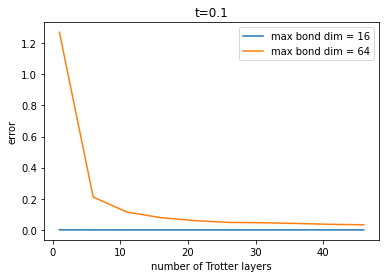

In [32]:
plt.plot(np.arange(1,50,5), errors_16, label='max bond dim = 16')
plt.plot(np.arange(1,50,5), errors_64, label='max bond dim = 64')
plt.xlabel('number of Trotter layers')
plt.ylabel('error')
plt.title('t=0.1')
plt.legend(loc='best')

In [35]:
# for a fixed bond dimension and t what if I increase system size?
max_dim = 20
t = 0.1

min_err = []
min_err_normalized = []
opt_r = []
for num_qubits in range(2,12,2):
    exact_operator = expm(1.j * t * xy_ham(num_qubits))
    errors_20 = []
    for i in tqdm(range(1,10,2)):
        evolution_operator = xy_mpo(num_qubits,t,num_trotter_layers=i,max_dim=20)
        errors_20.append(np.linalg.norm(exact_operator - evolution_operator.to_matrix()))
        
    err = min(errors_20)
    min_err.append(err)
    min_err_normalized.append(err/np.linalg.norm(exact_operator))
    opt_r.append(np.arange(1,50,2)[errors_20.index(err)])
    
    
    print(min_err[-1], min_err_normalized[-1] ,opt_r[-1])

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 249.57it/s]


1.5576682831405805e-15 7.788341415702903e-16 1


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 86.27it/s]


0.008815300822120228 0.002203825205530057 9


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.38it/s]


0.024871680418529874 0.0031089600523162347 9


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.77it/s]


0.10476534476343542 0.006547834047714714 7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.62it/s]

0.32571577540624463 0.01017861798144516 5


Text(0.5, 0, 'number of qubits')

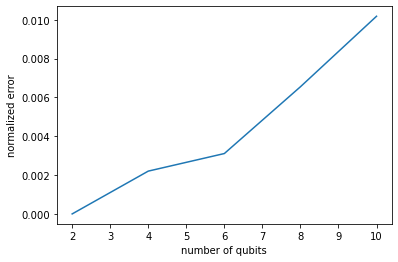

In [36]:
plt.plot(np.arange(2,12,2), min_err_normalized)
plt.ylabel('normalized error')
plt.xlabel('number of qubits')

In [37]:
# using large bond dimension MPO as a benchmark to find optimal r
num_qubits = 10
t = 0.1
benchmark_mpo = xy_mpo(num_qubits, t, num_trotter_layers=20, max_dim=100)

In [40]:
errors_16 = []
for i in tqdm(range(1,12,2)):
    evolution_operator = xy_mpo(num_qubits,t,num_trotter_layers=i,max_dim=16)
    errors_16.append(1-(evolution_operator.conj() @ benchmark_mpo).normalized_trace().real)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  3.00s/it]


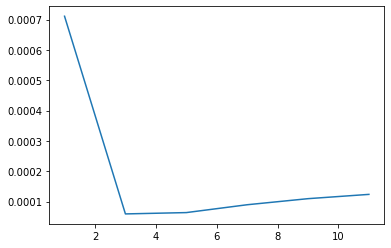

In [41]:
plt.plot(np.arange(1,12,2), errors_16)

In [45]:
# if we already have the benchmark_mpo, why not truncate it? does it give worse result than truncating while constructing mpo?
truncated_benchmark_mpo = benchmark_mpo.compress_symmetric(max_dim=16)
print(1-(truncated_benchmark_mpo.conj() @ benchmark_mpo).normalized_trace().real)

0.5284167762721639


In [46]:
np.linalg.norm(truncated_benchmark_mpo.to_matrix() - exact_operator) / (2**(num_qubits+1))

0.011357806324581735

In [47]:
evolution_operator = xy_mpo(num_qubits,t,num_trotter_layers=3,max_dim=16)
np.linalg.norm(evolution_operator.to_matrix() - exact_operator) / (2**(num_qubits+1))

0.00021609102980783517

In [ ]:
### future developments: higher order Trotter (easy to implement) and Taylor expansion

# Ansatz tests

## Ansatz methods

In [24]:
num_qubits = 4
t = 0.1
angles = np.asarray(np.random.rand(num_qubits) * 2 * np.pi)
params = np.asarray(np.random.rand(3*num_qubits) * 2*np.pi) 
d = Rotation_MPO(t, angles)
q = Single_Qubit_MPO(params)
even = Entangling_MPO(num_qubits, 0)
odd = Entangling_MPO(num_qubits, 1)

d.skeleton, q.skeleton, even.skeleton, odd.skeleton

([(1, 1, 2, 2), (1, 1, 2, 2), (1, 1, 2, 2), (1, 1, 2, 2)],
 [(1, 1, 2, 2), (1, 1, 2, 2), (1, 1, 2, 2), (1, 1, 2, 2)],
 [(1, 1, 2, 2), (1, 2, 2, 2), (2, 1, 2, 2), (1, 1, 2, 2)],
 [(1, 2, 2, 2), (2, 1, 2, 2), (1, 2, 2, 2), (2, 1, 2, 2)])

In [25]:
# layers are in fact unitary
layer = even @ q @ even 
approx_id = layer @ layer.conj()
np.linalg.norm(approx_id.to_matrix() - np.eye(2**num_qubits))

1.6762276682678098e-15

In [26]:
# is ansatz built from the right stacks
num_qubits = 4
num_w_layers = 2
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
ansatz.param_mpo_stacks

In [27]:
# testing contraction of ansatz
mpo = ansatz.mpo()

mat_list = [mpo.to_matrix() for mpo in ansatz.param_mpo_stacks]
odd_mat = ansatz.odd_mpo.to_matrix()
even_mat = ansatz.even_mpo.to_matrix()

w = mat_list[5] @ (even_mat @ mat_list[4] @ even_mat) @ (odd_mat @ mat_list[3] @ odd_mat) @ (even_mat @ mat_list[2] @ even_mat) @ (odd_mat @ mat_list[1] @ odd_mat)
mat = w @ mat_list[0] @ w.conj().T
np.linalg.norm(mat - mpo.to_matrix())

2.8749768147071947e-14

In [30]:
ansatz.num_stacks, ansatz.num_qubits

(6, 4)

## Ansatz properties

In [ ]:
# are there lots of small singular values in WDW^d? 
num_qubits = 4
num_w_layers = 1
angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
ansatz.mpo(min_sv_ratio=0.01).skeleton

In [ ]:
# as t becomes smaller W and W.conj() more or less cancel
num_qubits = 4
num_w_layers = 1
t = 0.0001
angles = jnp.asarray(np.random.rand(num_qubits))
params = jnp.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
mpo = Ansatz(t, angles, params).mpo(min_sv_ratio=0.0001)
np.linalg.norm(mpo.to_matrix() - np.eye(2**num_qubits))

In [ ]:
# how does bond dimension increase with number of layers
num_qubits = 4
num_w_layers = 3
t = 0.1
angles = jnp.asarray(np.random.rand(num_qubits))
params = jnp.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
mpo = Ansatz(t, angles, params).mpo(min_sv_ratio=0.01)
mpo.skeleton

In [ ]:
# how does bond dimension increase with system size
t = 0.1
min_sv_ratio = 0.1
dim_list = []
for num_qubits in tqdm(range(2,12,2)):
    num_w_layers = num_qubits
    angles = jnp.asarray(np.random.rand(num_qubits) * 2 * np.pi)
    params_array = jnp.asarray(np.random.rand((num_qubits-1)*num_w_layers, 15) * 2*np.pi) 
    mpo = ansatz_mpo(t, angles, params_array, min_sv_ratio=min_sv_ratio)
    dim_list.append(mpo.max_dim)   

In [ ]:
# timing computation of ansatz_mpo with num_w_layers (fixing error)
num_qubits = 6
t = 0.1

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 1
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
a = %timeit ansatz_mpo(t, angles, params_array, min_sv=0.1)

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 2
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
b = %timeit ansatz_mpo(t, angles, params_array, min_sv=0.1)

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 3
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
c = %timeit ansatz_mpo(t, angles, params_array, min_sv=0.1)

In [ ]:
# timing computation of ansatz_mpo with num_w_layers (fixing bond dimension)
num_qubits = 6
t = 0.1

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 1
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
a = %timeit ansatz_mpo(t, angles, params_array, max_dim=16)

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 2
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
b = %timeit ansatz_mpo(t, angles, params_array, max_dim=16)

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 3
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
c = %timeit ansatz_mpo(t, angles, params_array, max_dim=16)

angles = np.random.rand(num_qubits) * 2 * np.pi
num_w_layers = 4
params_array = np.random.rand(15, (num_qubits-1)*num_w_layers) * 2*np.pi 
c = %timeit ansatz_mpo(t, angles, params_array, max_dim=16)

In [ ]:
# random MPO approximates evolution better than random matrix
# identity approximates best 
num_qubits = 6
t = 0.1
num_trotter_layers=4
num_w_layers=1
max_dim = 16

angles = jnp.asarray(np.random.rand(num_qubits))
params_array = jnp.asarray(np.random.rand((num_qubits-1)*num_w_layers, 15))
ansatz = ansatz_mpo(t, angles, params_array)
rand_mpo = ansatz.to_matrix()

u, s, vh = np.linalg.svd(np.random.rand(2**num_qubits, 2**num_qubits))
rand_u = u@vh

target_mpo = xy_mpo(num_qubits, t, num_trotter_layers, max_dim=max_dim)

print('cost function with random unitary: ', 1-(np.trace(target_mpo.to_matrix().conj().T @ rand_u).real)/(2**num_qubits))
print('cost function with random MPO: ', 1-(np.trace(target_mpo.to_matrix().conj().T @ rand_mpo).real)/(2**num_qubits))
print('cost function with identity: ', 1-(np.trace(target_mpo.to_matrix().conj().T @ np.eye(2**num_qubits)).real)/(2**num_qubits))

In [9]:
# testing environment of intermediate stack
stack_idx = 4
env1, env2 = ansatz.stack_env(target_mpo, stack_idx)
(env1 @ ansatz.param_mpo_stacks[stack_idx] @ env2 @ ansatz.param_mpo_stacks[stack_idx].conj()).normalized_trace() - (target_mpo.conj()@ansatz.mpo()).normalized_trace()

(-1.4432899320127035e-15+1.6479873021779667e-15j)

# Environments

## Stack environments

In [2]:
num_qubits = 4
num_w_layers = 4
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)

num_trotter_steps = 5
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps)

In [4]:
# testing environment of the diagonal stack
stack_env1, stack_env2 = stack_env(ansatz, target_mpo, 0)
(stack_env1 @ ansatz.param_mpo_stacks[0]).trace() - (target_mpo.conj()@ansatz.mpo()).trace()

(-1.9984014443252818e-15-3.5648567431323386e-16j)

In [8]:
stack_env2 is None

True

In [5]:
# testing environment of last stack
stack_idx = 5
env1, env2 = stack_env(ansatz, target_mpo, stack_idx)
(env1 @ ansatz.param_mpo_stacks[stack_idx] @ env2 @ ansatz.param_mpo_stacks[stack_idx].conj()).trace() - (target_mpo.conj()@ansatz.mpo()).trace()

(-2.4424906541753444e-15+8.933825901280557e-17j)

## Building environments left to right 

In [9]:
num_qubits = 4
num_w_layers = 4
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
num_trotter_steps = 5
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps)

In [14]:
left_envs, right_envs = all_stack_envs(ansatz, target_mpo)
for i in range(1, ansatz.num_stacks): 
    old_stack_idx = i
    target_stack_idx = old_stack_idx - 1
    num_stacks = ansatz.num_stacks
    cur_right_env = right_envs[old_stack_idx]
    new_stack = ansatz.param_mpo_stacks[old_stack_idx]
    new_env = build_right_env(cur_right_env, new_stack, target_stack_idx, num_stacks)
    print(np.linalg.norm(new_env.to_matrix() - right_envs[target_stack_idx].to_matrix()))

0.0
3.456159610437581e-14
2.324298263763756e-14
3.970961532390114e-14
1.1898793469754864e-14
2.5828904275209807e-14
9.143172293433728e-15
1.2671897920291207e-14
0.0


In [15]:
for old_stack_idx in range(ansatz.num_stacks-1): 
    target_stack_idx = old_stack_idx + 1
    num_stacks = ansatz.num_stacks
    cur_left_env = left_envs[old_stack_idx]
    new_stack = ansatz.param_mpo_stacks[old_stack_idx]
    new_env = build_left_env(cur_left_env, new_stack, target_stack_idx, num_stacks)
    print(np.linalg.norm(new_env.to_matrix() - left_envs[target_stack_idx].to_matrix()))

0.0
3.2425956792951373e-15
1.2073969440659635e-14
2.7527096389266648e-14
3.8960704910914996e-14
7.597514177541783e-15
5.223029006990901e-15
1.1473807775270758e-14
0.0


## Node environments 

In [2]:
num_qubits = 4
num_w_layers = 4
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)

num_trotter_steps = 5
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps)
true_trace = 1 - (target_mpo.conj()@ansatz.mpo()).trace().real

In [3]:
# test semi_env methods
for stack_idx in range(ansatz.num_stacks):
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
    param_mpo = ansatz.param_mpo_stacks[stack_idx]
    link_datas1 = [stack_env1.nodes[i].data for i in range(num_qubits)]
    link_datas2 = [None] * num_qubits if stack_env2 is None else [stack_env2.nodes[i].data for i in range(num_qubits)]

    bottom_envs, top_envs = all_node_envs(param_mpo, stack_env1, stack_env2)
    for node_idx in range(num_qubits):
        n_env = node_env(param_mpo, node_idx, stack_env1, stack_env2)
        f_env = full_env(link_datas1[node_idx], link_datas2[node_idx], top_envs[node_idx], bottom_envs[node_idx]) 
        print(np.linalg.norm(f_env-n_env))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [6]:
# testing environment of nodes
for stack_idx in range(ansatz.num_stacks): 
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
    param_mpo = ansatz.param_mpo_stacks[stack_idx]

    for node_idx in range(num_qubits): 
        params = ansatz.angles[node_idx] if stack_idx == 0 else ansatz.params[stack_idx-1][node_idx*3:(node_idx+1)*3]
        n_env = node_env(param_mpo, node_idx, stack_env1, stack_env2)
        print(node_cost(params, n_env, t)- true_trace)

-1.3322676295501878e-15
-1.3322676295501878e-15
-1.2212453270876722e-15
-6.661338147750939e-16
-2.220446049250313e-16
-5.551115123125783e-16
-2.220446049250313e-16
-8.881784197001252e-16
-1.3322676295501878e-15
-1.3322676295501878e-15
-1.3322676295501878e-15
-1.7763568394002505e-15
-1.2212453270876722e-15
-8.881784197001252e-16
-1.887379141862766e-15
2.220446049250313e-16
-8.881784197001252e-16
-8.881784197001252e-16
-5.551115123125783e-16
1.3322676295501878e-15
1.5543122344752192e-15
2.3314683517128287e-15
1.4432899320127035e-15
4.440892098500626e-16
0.0
1.9984014443252818e-15
7.771561172376096e-16
-2.1094237467877974e-15
1.5543122344752192e-15
1.6653345369377348e-15
5.551115123125783e-16
-1.3322676295501878e-15
-8.881784197001252e-16
6.661338147750939e-16
-1.1102230246251565e-16
-2.6645352591003757e-15
1.1102230246251565e-16
-2.220446049250313e-16
6.661338147750939e-16
2.9976021664879227e-15


In [9]:
bond_dim = 60
stack_env1 = random_mpo(num_qubits, bond_dim)
stack_env2 = random_mpo(num_qubits, bond_dim)
%timeit -o node_env(param_mpo, node_idx, stack_env1, stack_env2)

2.52 s ± 452 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 2.52 s ± 452 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

## Building environments from top and bottom

In [10]:
num_qubits = 4
num_w_layers = 4
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
num_trotter_steps = 5
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps)

In [13]:
for stack_idx in range(ansatz.num_stacks):
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
    param_mpo = ansatz.param_mpo_stacks[stack_idx]

    bottom_envs, top_envs = all_node_envs(param_mpo, stack_env1, stack_env2)
    link_datas1 = [stack_env1.nodes[i].data for i in range(num_qubits)]
    link_datas2 = [None] * num_qubits if stack_env2 is None else [stack_env2.nodes[i].data for i in range(num_qubits)]

    for target_node_idx in range(num_qubits-1):
        idx = target_node_idx + 1
        test_bottom_semi_env = build_bottom_env(bottom_envs[idx], ansatz.param_mpo_stacks[stack_idx].nodes[idx].data, link_datas1[idx], link_datas2[idx])
        print(np.linalg.norm(test_bottom_semi_env - bottom_envs[target_node_idx]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# Optimization tests

## Node cost and derivative 

In [2]:
num_qubits = 4
num_w_layers = 4
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
num_trotter_steps = 5
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps)

In [3]:
# does node_cost product correct cost function in rz stack
stack_idx = 0
stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
stack_params = ansatz.angles
true_cost = 1 - (target_mpo.conj() @ ansatz.mpo()).trace().real

for node_idx in range(num_qubits):
    n_env = node_env(ansatz.param_mpo_stacks[stack_idx], node_idx, stack_env1)
    print(node_cost(ansatz.angles[node_idx], n_env, t) - true_cost)

-1.7763568394002505e-15
-2.1094237467877974e-15
-2.220446049250313e-15
-1.887379141862766e-15


In [4]:
# does node_cost produce correct cost function in general stack
for stack_idx in range(1, ansatz.num_stacks): 
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
    stack_params = ansatz.params[stack_idx-1]

    for node_idx in range(num_qubits):
        node_idx = 3
        n_env = node_env(ansatz.param_mpo_stacks[stack_idx], node_idx, stack_env1, stack_env2)
        print(node_cost(ansatz.params[stack_idx-1][node_idx*3:(node_idx+1)*3], n_env, t) - true_cost)

-1.2212453270876722e-15
-1.2212453270876722e-15
-1.2212453270876722e-15
-1.2212453270876722e-15
-1.4432899320127035e-15
-1.4432899320127035e-15
-1.4432899320127035e-15
-1.4432899320127035e-15
-9.992007221626409e-16
-9.992007221626409e-16
-9.992007221626409e-16
-9.992007221626409e-16
-1.1102230246251565e-15
-1.1102230246251565e-15
-1.1102230246251565e-15
-1.1102230246251565e-15
-8.881784197001252e-16
-8.881784197001252e-16
-8.881784197001252e-16
-8.881784197001252e-16
-4.107825191113079e-15
-4.107825191113079e-15
-4.107825191113079e-15
-4.107825191113079e-15
2.1094237467877974e-15
2.1094237467877974e-15
2.1094237467877974e-15
2.1094237467877974e-15
1.2212453270876722e-15
1.2212453270876722e-15
1.2212453270876722e-15
1.2212453270876722e-15
-9.992007221626409e-16
-9.992007221626409e-16
-9.992007221626409e-16
-9.992007221626409e-16


In [5]:
# does rz_node_deriv reproduce fd
stack_idx = 0
stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)

for node_idx in range(num_qubits):
    n_env = node_env(ansatz.param_mpo_stacks[stack_idx], node_idx, stack_env1)
    fd = node_grad_fd(ansatz.angles[node_idx], n_env, t)
    exact = rz_node_deriv(n_env, ansatz.angles[node_idx], t)
    print(fd-exact)

[-1.91823554e-14]
[-7.82152121e-14]
[3.58519746e-13]
[5.19135516e-13]


In [6]:
# does general_node_deriv reproduce fd
for stack_idx in range(1,ansatz.num_stacks):
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)

    for node_idx in range(num_qubits):
        n_env = node_env(ansatz.param_mpo_stacks[stack_idx], node_idx, stack_env1, stack_env2)
        fd = node_grad_fd(ansatz.params[stack_idx-1][node_idx*3:(node_idx+1)*3], n_env)
        exact = general_node_deriv(n_env, ansatz.params[stack_idx-1][node_idx*3:(node_idx+1)*3])
        print(fd-exact)

[ 1.87955207e-12  5.55111512e-13 -1.28787259e-12]
[8.98121855e-13 5.55111512e-13 6.02024398e-14]
[-2.64052669e-13  0.00000000e+00  9.11491911e-13]
[ 1.10750298e-12 -3.57181498e-18 -1.18040907e-12]
[-1.90458760e-13 -1.84298778e-12 -1.36601884e-12]
[ 1.09337539e-12 -1.38419029e-12 -1.79359479e-12]
[-8.86478391e-13 -1.04666129e-12 -2.38186207e-13]
[-4.38760139e-13 -1.15382313e-13 -1.34538734e-12]
[ 4.15584234e-13 -8.10909174e-13  9.35476089e-13]
[ 1.06244874e-12  1.04325023e-13 -2.94207800e-13]
[-8.54176105e-13 -7.14712035e-13 -7.65553311e-13]
[ 7.23296423e-13 -1.76215206e-12 -2.17881420e-12]
[1.49215362e-12 3.80359318e-13 3.37437543e-13]
[-2.10054196e-13  2.39729433e-13  1.36519973e-12]
[ 5.35127498e-14 -2.02803779e-12  1.07804911e-12]
[-3.56770169e-13 -3.90416432e-13  7.66795048e-13]
[-1.97841049e-12  3.37438627e-13  4.98843263e-13]
[ 2.24370522e-12 -3.96565593e-13  2.11068055e-12]
[ 2.74075901e-12 -1.24711607e-12 -8.89070122e-13]
[-1.57096558e-12 -3.04783195e-12 -2.58810855e-12]
[-1.53

## Node optimizer

In [7]:
num_qubits = 4
num_w_layers = 4
t = 0.1

angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
num_trotter_steps = 5
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps)

In [8]:
# optimizing all nodes
for stack_idx in range(ansatz.num_stacks):
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
    for node_idx in range(num_qubits):
        n_env = node_env(ansatz.param_mpo_stacks[stack_idx], node_idx, stack_env1, stack_env2)
        new_cost, new_node = node_optimizer(ansatz, stack_idx, node_idx, n_env, t)
        print(new_cost)

0.030552269476530114
0.02991496589138154
0.02952196632948223
0.029110640738004845
0.02900827532653505
0.028972289720852862
0.02885249227129638
0.028690067347045933
0.02865446118098336
0.028481299404716665
0.028469596388596474
0.02840285433069656
0.028352666677794236
0.028338652323489866
0.02831254878179512
0.028179991887192446
0.028164296967986613
0.02811934286662421
0.028040942564564242
0.028007119322308593
0.027632402436266745
0.027590874936112342
0.027527561699842606
0.027518102213205275
0.027413480093662512
0.027258446220916444
0.027175046954629023
0.027164051914189247
0.02699599554093457
0.02685873290733043
0.026756060431972317
0.026609068114724188
0.026606375286933437
0.0265858166092805
0.02655997165866819
0.026530264675967086
0.026517963603068906
0.026468459464601635
0.02644714203235643
0.026382691854009543


In [9]:
# testing sweep_up_down
for stack_idx in range(ansatz.num_stacks): 
    param_mpo = ansatz.param_mpo_stacks[stack_idx]
    stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
    link_datas1 = [stack_env1.nodes[node_idx].data for node_idx in range(ansatz.num_qubits)]
    link_datas2 = [None] * ansatz.num_qubits if stack_env2 is None else [stack_env2.nodes[node_idx].data for node_idx in range(ansatz.num_qubits)]
    bottom_envs, top_envs = all_node_envs(param_mpo, stack_env1, stack_env2)
    cost_list = sweep_up_down(ansatz, stack_idx, bottom_envs, top_envs, link_datas1, link_datas2, t)
    print(cost_list[0], cost_list[-1])

0.02527188180955786 0.022590688322706387
0.02253058812221953 0.021431492801743834
0.021378050310841945 0.02079963990454381
0.020687600081792823 0.02037807778148515
0.02033370523385747 0.019643837505066153
0.01962274699903499 0.019207300456585474
0.019199234891908112 0.018821243472149307
0.018679078288265316 0.018375961906559546
0.018341727173868172 0.017935265876254936
0.01790375124036303 0.017671885175705726


## Nodewise training 

In [11]:
num_qubits = 4
num_w_layers = 4
t = 0.1
num_trotter_steps = 5
noisy_cost_data, exact_cost_data, angles, params = nodewise_train(num_qubits, t, num_trotter_steps, num_w_layers, num_stack_sweeps=10, max_dim=16)

 10%|████████▎                                                                          | 1/10 [00:46<06:58, 46.53s/it]

0.027848601009112794


 20%|████████████████▌                                                                  | 2/10 [00:55<03:15, 24.42s/it]

0.011515905576439334


 30%|████████████████████████▉                                                          | 3/10 [01:01<01:50, 15.83s/it]

0.00794056165369672


 40%|█████████████████████████████████▏                                                 | 4/10 [01:06<01:10, 11.74s/it]

0.006314981107777506


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:11<00:47,  9.42s/it]

0.005365805167057314


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:17<00:32,  8.01s/it]

0.004788132460756933


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:22<00:21,  7.05s/it]

0.004383957943661754


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:27<00:12,  6.44s/it]

0.004059884829964111


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:32<00:06,  6.05s/it]

0.0037818468782071513


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:37<00:00,  9.79s/it]

0.0035130111264624064


# Timing

In [2]:
%load_ext line_profiler

In [2]:
num_qubits = 8
t=0.1
num_trotter_steps = 5
num_w_layers = 6

In [12]:
%lprun -f nodewise_train nodewise_train(num_qubits, t, num_trotter_steps, num_w_layers, num_stack_sweeps=1, num_node_sweeps=20, max_dim=32)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [05:58<00:00, 27.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [12:52<00:00, 772.14s/it]

0.06360065512057977


In [3]:
# bottleneck is sweep_and_down
angles = np.asarray(np.random.rand(num_qubits))
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
ansatz = Ansatz(t, angles, params)
target_mpo = xy_mpo(num_qubits, t, num_trotter_steps, max_dim=64)

stack_idx = 1
param_mpo = ansatz.param_mpo_stacks[stack_idx]
stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx, max_dim=64)
link_datas1 = [stack_env1.nodes[node_idx].data for node_idx in range(ansatz.num_qubits)]
link_datas2 = [None] * ansatz.num_qubits if stack_env2 is None else [stack_env2.nodes[node_idx].data for node_idx in range(ansatz.num_qubits)]
bottom_envs, top_envs = all_node_envs(param_mpo, stack_env1, stack_env2)

In [14]:
%lprun -f sweep_up_down sweep_up_down(ansatz, stack_idx, bottom_envs, top_envs, link_datas1, link_datas2, t)

In [15]:
# bottleneck is node_optimizer
node_idx = 1
n_env = node_env(ansatz.param_mpo_stacks[stack_idx], node_idx, stack_env1, stack_env2)

In [16]:
%lprun -f node_optimizer node_optimizer(ansatz, stack_idx, node_idx, n_env, t)

In [5]:
# bottleneck is general_node_deriv
stack_idx = 1
param_mpo = ansatz.param_mpo_stacks[stack_idx]
stack_env1, stack_env2 = stack_env(ansatz, target_mpo, stack_idx)
node_idx = 1
n_env = node_env(param_mpo, node_idx, stack_env1, stack_env2)
%timeit np.asarray(general_node_deriv(n_env, ansatz.params[stack_idx-1][node_idx*3:(node_idx+1)*3]))

33.3 µs ± 3.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Test runs

## Can I compile identity? 

In [ ]:
num_qubits = 4
target_mpo = MPO([Node(jnp.eye(2,2)[jnp.newaxis,jnp.newaxis,:,:]) for i in range(num_qubits)])
t = 0.1 # doesn't really matter since angles should equal zero
num_w_layers = 1
angles = jnp.asarray(np.random.rand(num_qubits)) 
params = jnp.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) # doesn't really matter once angles << 1 
ansatz = Ansatz(t, angles, params)
min_sv_ratio = None
max_dim = None

In [ ]:
1-(ansatz.mpo().conj() @ target_mpo).normalized_trace() 

In [ ]:
env = ansatz.deriv_mpo(target_mpo, 0, min_sv_ratio, max_dim)
angles = ansatz.angles
print(angles)
new_cost_list, angles = optimizer(d_cost, d_cost_grad, angles, env, t, max_iter=200)
ansatz.update(0, angles)
print(angles)
print(new_cost_list[-1])

In [ ]:
param_idx_left = np.arange(ansatz.num_stacks-1)
for i in tqdm(range(ansatz.num_stacks-1)): 
    choice = np.random.randint(len(param_idx_left))
    param_idx = param_idx_left[choice]
    param_idx_left = np.delete(param_idx_left, choice)
    stack_idx = param_idx + 1
    
    env1, env2 = ansatz.deriv_mpo(target_mpo, stack_idx)
    stack_params = ansatz.params[param_idx]
    print(stack_params)
    new_cost_list, stack_params = optimizer(layer_cost, layer_cost_grad, stack_params, env1, env2, max_iter=50)
    ansatz.update(stack_idx, stack_params)
    print(stack_params)
    print(new_cost_list[-1])

In [ ]:
env = ansatz.deriv_mpo(target_mpo, 0, min_sv_ratio, max_dim)
angles = ansatz.angles
print(angles)
new_cost_list, angles = optimizer(d_cost, d_cost_grad, angles, env, t, max_iter=500)
ansatz.update(0, angles)
print(angles)
print(new_cost_list[-1])

In [ ]:
env = ansatz.deriv_mpo(target_mpo, 0, min_sv_ratio, max_dim)
angles = ansatz.angles
print(angles)
new_cost_list, angles = optimizer(d_cost, d_cost_grad, angles, env, t, max_iter=500)
ansatz.update(0, angles)
print(angles)
print(new_cost_list[-1])

In [ ]:
# this doesn't have to be identity because the diagonal portion is 
(ansatz.odd_mpo @ ansatz.param_mpo_stacks[1] @ ansatz.odd_mpo).to_matrix()

## 2 qubit simulation (no max_dim, no min_sv_ratio) 

In [ ]:
num_qubits = 2
t=0.1
num_trotter_layers = 5
num_w_layers = 1
cost_list1, angles1, params_array1 = train(num_qubits, t, num_trotter_layers, num_w_layers=num_w_layers, num_steps=100, eta=10)

In [ ]:
cost_list2, angles2, params_array2 = train(num_qubits, t, num_trotter_layers, num_w_layers=num_w_layers, num_steps=100, eta=10, angles=angles1, params_array=params_array1)

In [ ]:
cost_list3, angles3, params_array3 = train(num_qubits, t, num_trotter_layers, num_w_layers=num_w_layers, num_steps=100, eta=10, angles=angles2, params_array=params_array2)

In [ ]:
plt.plot(cost_list1+cost_list2+cost_list3)
plt.yscale('log')

## 2 qubit simulation (finite differences, no max_dim, no min_sv_ratio) 

In [ ]:
num_qubits = 2
t=0.1
num_trotter_layers = 5
num_w_layers = 1
cost_list1, angles1, params_array1 = train(num_qubits, t, num_trotter_layers, num_w_layers=num_w_layers, num_steps=100, eta=10)

In [ ]:
cost_list2, angles2, params_array2 = train(num_qubits, t, num_trotter_layers, num_w_layers=num_w_layers, num_steps=100, eta=10, angles=angles1, params_array=params_array1)

## 4 qubit simulation 

In [ ]:
num_qubits = 6
t = 0.1
num_w_layers = 6
num_trotter_steps = 5
angles = np.asarray(np.random.rand(num_qubits)) 
params = np.asarray(np.random.rand(2*num_w_layers+1, 3*num_qubits)) 
train(num_qubits, t, num_trotter_steps, num_w_layers)

# Known problem 1: Initializing from identity

In [ ]:
# initializing the ansatz as identity
num_qubits = 6
t=0.1
angles = jnp.zeros(num_qubits)
params_array = jnp.zeros((num_qubits-1, 15))
a = ansatz_mpo(t, angles, params_array, min_sv_ratio=0.1)
a.to_matrix()

In [ ]:
# test derivatives
num_qubits=6
t=0.5
num_trotter_layers = 4
angles =jnp.zeros(num_qubits)+0.1
angles = angles.at[0].set(0.0)
angles = angles.at[1].set(0.0)
angles = angles.at[2].set(0.0)
angles = angles.at[3].set(0.0)
angles = angles.at[4].set(0.0)
angles = angles.at[5].set(0.0)
target_mpo = xy_mpo(num_qubits, t, num_trotter_layers, max_dim=16)
def angle_cost(target_mpo, t, angles):
    ''' ||target_mpo - ansatz_mpo|| / 2^(n+1) '''
    return 1 - (target_mpo.conj() @ D_Layer(t, angles)).normalized_trace().real

angle_cost(target_mpo, t, angles)
grad_angle = grad(angle_cost, argnums=(2))
grad_angle(target_mpo, t, angles)

# Stackwise optimization

In [18]:
from stackwise_train import *

## Stack cost and derivative

In [9]:
# test stack_cost for diagonal stack
environment = ansatz.stack_env(target_mpo, 0)
stack_cost(angles, environment, t) - (np.linalg.norm(ansatz.mpo().to_matrix() - target_mpo.to_matrix())**2)/ 32

1.5199647096508784e-14

In [11]:
# test stack_cost for non-diagonal stack
stack_idx = 3
env1, env2 = ansatz.stack_env(target_mpo, stack_idx)
stack_cost(params[stack_idx-1], env1, env2) - (np.linalg.norm(ansatz.mpo().to_matrix() - target_mpo.to_matrix())**2)/ 32

1.5643736306358846e-14

In [17]:
environment = ansatz.stack_env(target_mpo, 0)
stack_grad(angles, environment, t)

array([0.00139768, 0.00201162, 0.0001509 , 0.0005454 ])

In [16]:
# test stack_grad
stack_idx = 3
env1, env2 = ansatz.stack_env(target_mpo, stack_idx)
stack_grad(params[stack_idx-1], env1, env2)

array([-6.96367969e-05,  1.34792196e-04,  3.36436148e-04, -6.18128971e-04,
        1.00152299e-04, -9.90862343e-04,  9.31964751e-04, -1.86763987e-04,
       -1.86482477e-04,  6.50025522e-04,  4.99087839e-04, -5.88299226e-05])

## Stackwise training

In [19]:
num_qubits = 4
t = 0.1
num_trotter_steps = 5
num_w_layers = 4
max_dim = 16
stackwise_train(num_qubits, t, num_trotter_steps, num_w_layers, max_dim=max_dim, num_sweeps=3)

 33%|████████████████████████████                                                        | 1/3 [00:57<01:54, 57.28s/it]

0.028437829940798576 0.028437829940798687


 67%|████████████████████████████████████████████████████████                            | 2/3 [01:36<00:46, 46.44s/it]

0.01013623094504279 0.010136230945042124


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:23<00:00, 47.77s/it]

0.009934937605322158 0.009934937605321714


([0.02963628805198948,
  0.02909621171254617,
  0.02844030529846031,
  0.028437829940798687,
  0.013279325053111801,
  0.010141275324740295,
  0.010140784562254757,
  0.010136230945042124,
  0.009935094595761473,
  0.009934964565686322,
  0.009934947371659897,
  0.009934937605321714],
 [0.02970017378901768,
  0.028437829940798576,
  0.01013623094504279,
  0.009934937605322158],
 array([-1.99170165e-03, -2.83109493e+00,  2.82950320e+00,  2.03000982e-03]),
 array([[-7.83889671e-01,  2.59290634e-02,  4.01991522e-02,
         -8.66898772e-05,  7.35448929e-02,  8.19807973e-02,
         -7.83892892e-01,  4.52516990e-02,  2.00397442e-02,
          3.67470103e-03,  8.03002044e-02,  2.65492511e-02],
        [ 7.35213344e-02, -3.36273900e-02,  8.05239922e-03,
          1.57151173e+00, -1.99996192e-02,  1.03257710e-01,
         -6.99571720e-10,  1.03114351e-03, -1.03114352e-03,
         -3.90368423e-03, -2.35697751e-02,  5.15847619e-02],
        [ 4.46650673e-02,  3.79719731e-02,  7.60365752e-02,

## Stackwise training with noise 

In [20]:
num_qubits = 4
t = 0.1
num_trotter_steps = 5
num_w_layers = 4
max_dim = 4
stackwise_train(num_qubits, t, num_trotter_steps, num_w_layers, max_dim=max_dim, num_sweeps=3)

 33%|████████████████████████████                                                        | 1/3 [00:59<01:59, 59.85s/it]

0.02656562275478591 0.026354173868404107


 67%|████████████████████████████████████████████████████████                            | 2/3 [01:45<00:51, 51.25s/it]

0.01733523887103705 0.017266000011702642


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:27<00:00, 49.08s/it]

0.016199865223630372 0.016128695696956852


([0.028938935904301633,
  0.02714555334746538,
  0.02664754259724278,
  0.026636976617159913,
  0.026610658074240012,
  0.026513539384511287,
  0.026474837153266484,
  0.026451356971541662,
  0.026363845400986463,
  0.026354173868404107,
  0.021055136284950038,
  0.020828673370719475,
  0.019545706690016318,
  0.0195414991155205,
  0.01953797663460244,
  0.01759694186400007,
  0.017373632642255332,
  0.017364576964040035,
  0.017360504914117114,
  0.017266000011702642,
  0.016576424902841946,
  0.01655764374996238,
  0.01641822626519107,
  0.016366496602161718,
  0.016366377214832917,
  0.01632271733345214,
  0.016244871761674995,
  0.0162443915372964,
  0.016194750463895957,
  0.016128695696956852],
 [0.029655916701596174,
  0.02656562275478591,
  0.01733523887103705,
  0.016199865223630372],
 array([ 1.98483550e-03, -1.73023593e+00, -1.77582237e+00,  2.09964163e+00]),
 array([[ 3.54984236e-06,  6.95504610e-03,  7.87134515e-02,
         -6.34672895e-04,  2.94800562e-02,  8.84307754e-0